In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import random 
import string

In [3]:
#Common Model Algorithm

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [4]:
#For data pre-processing and other sampling techniques

from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from statsmodels import api as sm
from scipy import stats

In [5]:
import matplotlib.pyplot as plt

import seaborn as sns

In [6]:
data =pd.read_excel('Student Applications & Performance.xlsx')

In [7]:
data.head(4)

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0


In [8]:
data.shape

(3400, 56)

In [9]:
#Data Quality Checks

#Looking for null values

data.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

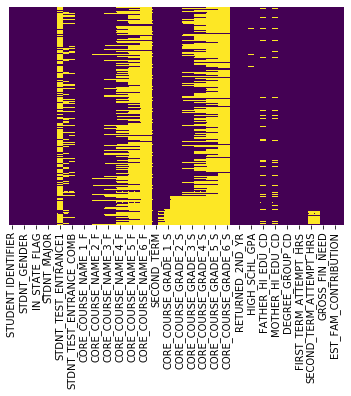

In [10]:
sns.heatmap(data.isnull(),yticklabels = False,cbar = False,cmap ='viridis')

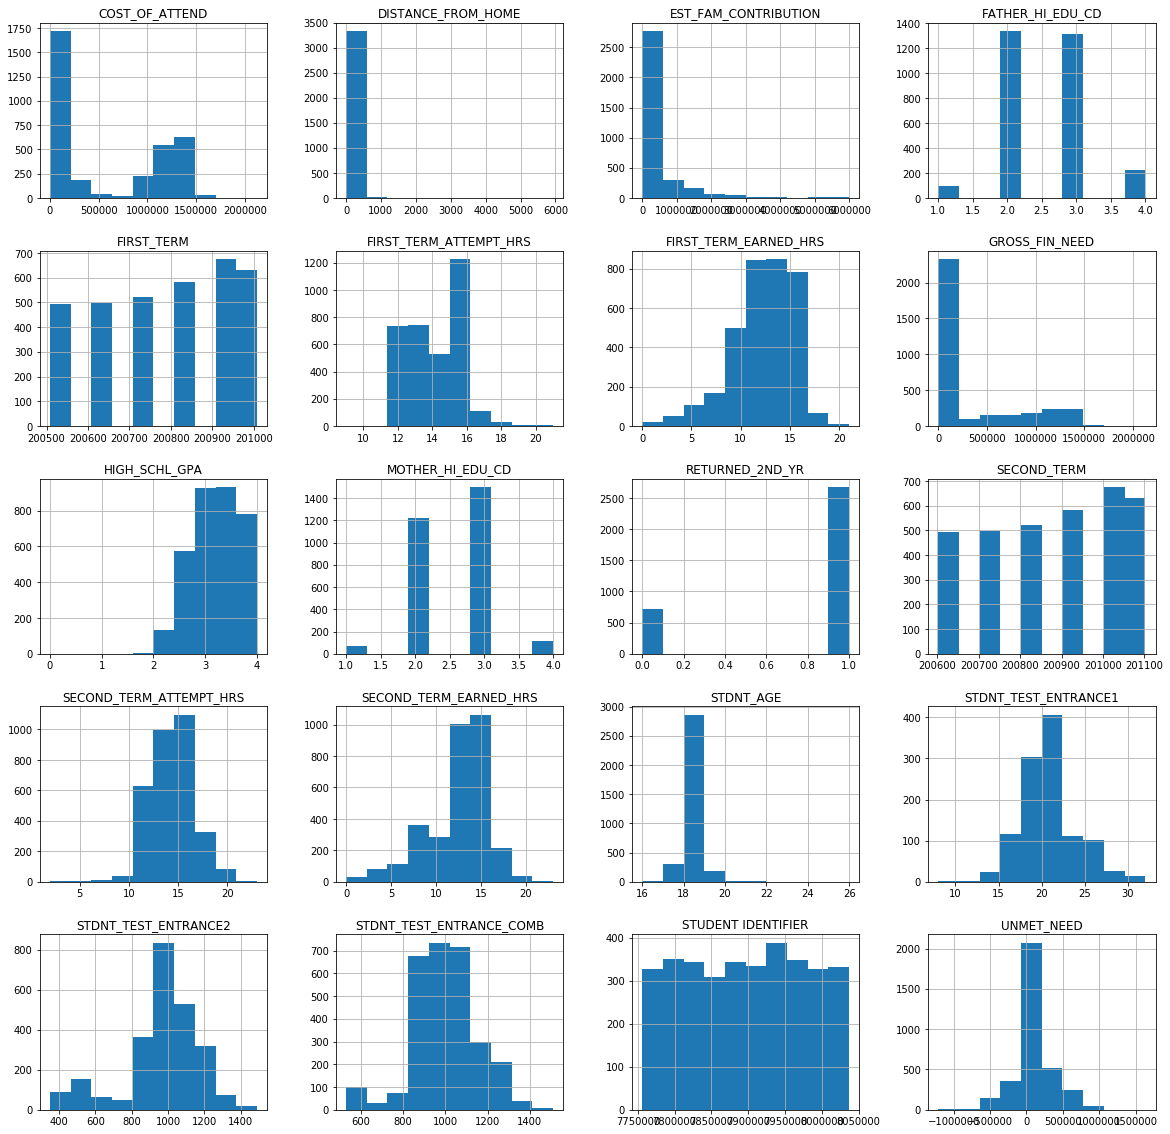

In [11]:
data.hist(figsize=(20,20))
plt.show()

In [12]:
#DROPING COLUMNS
data.drop(['STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2','FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','CORE_COURSE_NAME_4_F','CORE_COURSE_GRADE_4_F'
         ,'CORE_COURSE_NAME_5_F','CORE_COURSE_GRADE_5_F','CORE_COURSE_NAME_6_F','CORE_COURSE_GRADE_6_F','CORE_COURSE_NAME_6_S','CORE_COURSE_GRADE_6_S',
         'CORE_COURSE_NAME_5_S','CORE_COURSE_GRADE_5_S','CORE_COURSE_NAME_4_S','CORE_COURSE_GRADE_4_S','HIGH_SCHL_NAME','STDNT_MINOR','DEGREE_GROUP_CD'],axis = 1,inplace = True)







In [13]:
data.shape

(3400, 37)

In [14]:
#TARGET VARIABLE

def d(x):
    if x==0.0:
        return 1.0
    else:
        return 0.0

In [15]:
data['RETURNED_2ND_YR'] = data['RETURNED_2ND_YR'].map(d)

In [16]:
data['RETURNED_2ND_YR'].value_counts()

0.0    2677
1.0     723
Name: RETURNED_2ND_YR, dtype: int64

In [17]:
#DATA CLEANING

data['FIRST_TERM'] = data['FIRST_TERM'].replace({200508:2005,200608:2006,200708:2007,200808:2008,200908:2009,201008:2010})

In [18]:
data['FIRST_TERM'].head()

0    2007
1    2008
2    2010
3    2007
4    2008
Name: FIRST_TERM, dtype: int64

In [19]:
data['SECOND_TERM'] = data['SECOND_TERM'].replace({200602:2006,200702:2007,200802:2008,200902:2009,201002:2010,201102:2011})

In [20]:
data['SECOND_TERM'].head()

0    2008
1    2009
2    2011
3    2008
4    2009
Name: SECOND_TERM, dtype: int64

In [21]:
data['CORE_COURSE_NAME_1_F'] = data['CORE_COURSE_NAME_1_F'].str.slice(0,4)

In [22]:
data['CORE_COURSE_NAME_3_F'].head()

0    ENGL 1102
1    ITDS 2735
2    HIST 2111
3          NaN
4    CPSC 1105
Name: CORE_COURSE_NAME_3_F, dtype: object

In [23]:
data['CORE_COURSE_NAME_2_F'] = data['CORE_COURSE_NAME_2_F'].str.slice(0,4)

In [24]:
data['CORE_COURSE_NAME_3_F'] = data['CORE_COURSE_NAME_3_F'].str.slice(0,4)

In [25]:
from statsmodels.tools import add_constant as add_constant

data = add_constant(data)

data.head()

C:\Users\viksb\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,...,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,1.0,7808615,18,F,BGD 1,Y,N,Undeclared,1150.0,2007,...,No Information,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,1.0,7830063,19,F,BGD 1,N,N,Undeclared,1190.0,2008,...,College/Beyond,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,1.0,7847538,18,M,BGD 1,Y,N,Mathematics,1030.0,2010,...,Other/Unknown,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,1.0,8006429,18,M,BGD 1,Y,N,Undeclared,1220.0,2007,...,College/Beyond,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,1.0,7962680,18,F,BGD 1,Y,N,Art,1190.0,2008,...,High School,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [26]:
from scipy.stats import norm,skew

(mu,sigma) = norm.fit(data.loc[data['RETURNED_2ND_YR']== 1,'STDNT_AGE'])

print('Ex-student:average age ={:.1f} years old and standard deviation ={:.1f}'.format(mu,sigma))



Ex-student:average age =18.0 years old and standard deviation =0.6


In [27]:
(mu,sigma) = norm.fit(data.loc[data['RETURNED_2ND_YR']== 0,'STDNT_AGE'])

print('Current student:average age ={:.1f} years old and standard deviation ={:.1f}'.format(mu,sigma))

Current student:average age =18.0 years old and standard deviation =0.5


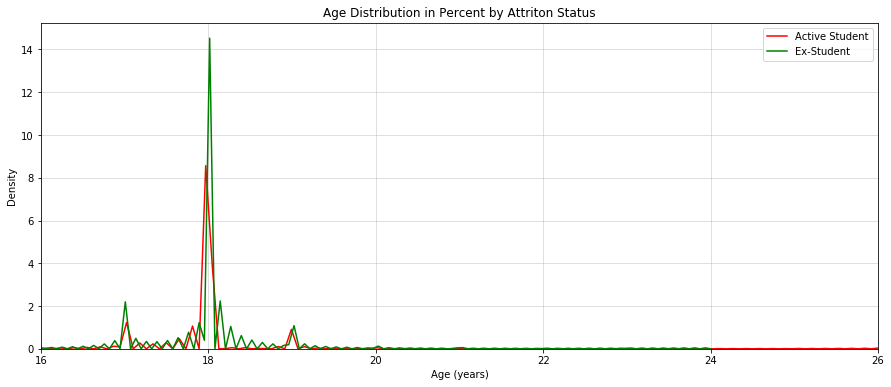

In [28]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')

plt.grid(True,alpha=0.5)
sns.kdeplot(data.loc[data['RETURNED_2ND_YR']==0,'STDNT_AGE'],label ='Active Student',color ='red')

sns.kdeplot(data.loc[data['RETURNED_2ND_YR']==1,'STDNT_AGE'],label ='Ex-Student',color ='green')

plt.xlim(left=16,right=26)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attriton Status');

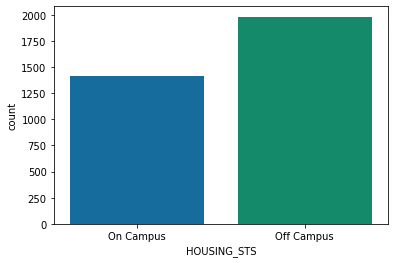

In [29]:
sns.countplot(x ='HOUSING_STS',data=data)

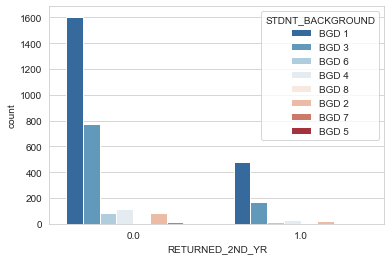

In [30]:
sns.set_style('whitegrid')
sns.countplot(x ='RETURNED_2ND_YR',hue='STDNT_BACKGROUND',data = data,palette ='RdBu_r')

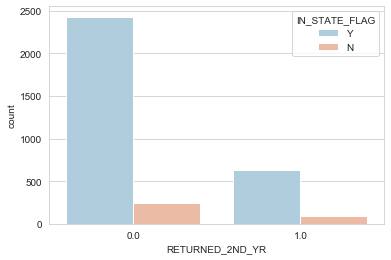

In [31]:
sns.set_style('whitegrid')
sns.countplot(x ='RETURNED_2ND_YR',hue='IN_STATE_FLAG',data = data,palette ='RdBu_r')

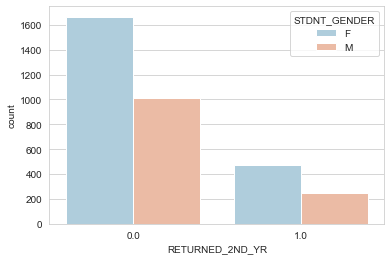

In [32]:
sns.set_style('whitegrid')
sns.countplot(x ='RETURNED_2ND_YR',hue='STDNT_GENDER',data = data,palette ='RdBu_r')

In [33]:
Q1 =data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

const                             0.00
STUDENT IDENTIFIER           136968.75
STDNT_AGE                         0.00
STDNT_TEST_ENTRANCE_COMB        200.00
FIRST_TERM                        3.00
SECOND_TERM                       3.00
RETURNED_2ND_YR                   0.00
DISTANCE_FROM_HOME               69.00
HIGH_SCHL_GPA                     0.69
FIRST_TERM_ATTEMPT_HRS            2.00
FIRST_TERM_EARNED_HRS             4.00
SECOND_TERM_ATTEMPT_HRS           3.00
SECOND_TERM_EARNED_HRS            4.00
GROSS_FIN_NEED               599580.00
COST_OF_ATTEND              1192815.00
EST_FAM_CONTRIBUTION         324180.00
UNMET_NEED                   187615.50
dtype: float64


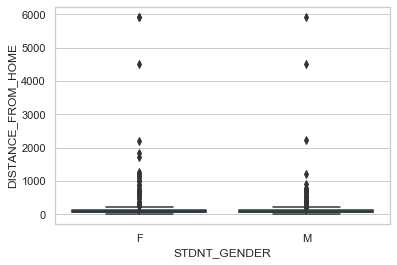

In [34]:
sns.set(style ='whitegrid')
ax = sns.boxplot(x =data['STDNT_GENDER'],y ='DISTANCE_FROM_HOME',data = data ,palette ='winter')

In [35]:
print(data['DISTANCE_FROM_HOME'].skew())

18.439510065174744


In [36]:
data['DISTANCE_FROM_HOME'].describe()

count    3375.000000
mean       99.825185
std       235.196984
min         0.000000
25%        69.000000
50%        69.000000
75%       138.000000
max      5932.000000
Name: DISTANCE_FROM_HOME, dtype: float64

In [37]:
print(data['DISTANCE_FROM_HOME'].quantile(0.10))

print(data['DISTANCE_FROM_HOME'].quantile(0.90))

0.0
150.0


In [38]:
data['DISTANCE_FROM_HOME'] = np.where(data['DISTANCE_FROM_HOME'] < 0.0 ,0.0,data['DISTANCE_FROM_HOME'])

data['DISTANCE_FROM_HOME'] = np.where(data['DISTANCE_FROM_HOME']> 150 ,150,data['DISTANCE_FROM_HOME'])

In [39]:
print(data['DISTANCE_FROM_HOME'].skew())

-0.07085149394802058


In [40]:
data.groupby('STDNT_GENDER')['DISTANCE_FROM_HOME'].describe()

,count,mean,std,min,25%,50%,75%,max
STDNT_GENDER,,,,,,,,
F,2120.0,81.237264,52.071527,0.0,69.0,69.0,138.0,150.0
M,1255.0,76.185657,49.978015,0.0,69.0,69.0,136.0,150.0


In [41]:
def stud_comb(cols):
    DISTANCE_FROM_HOME = cols[0]
    STDNT_GENDER =cols[1]
    
    if pd.isnull(DISTANCE_FROM_HOME):
        
        if STDNT_GENDER=='F':
            return 81.237264
        else:
            return 76.185657
    else:
        return DISTANCE_FROM_HOME

In [42]:
data['DISTANCE_FROM_HOME'] = data[['DISTANCE_FROM_HOME','STDNT_GENDER']].apply(stud_comb,axis =1)

In [43]:
data['FIRST_TERM_PERFORMANCE'] = data['FIRST_TERM_EARNED_HRS']/data['FIRST_TERM_ATTEMPT_HRS']

In [44]:
data['SECOND_TERM_PERFORMANCE'] = data['SECOND_TERM_EARNED_HRS']/data['SECOND_TERM_ATTEMPT_HRS']

In [45]:
data['SECOND_TERM_PERFORMANCE'].describe()

count    3191.000000
mean        0.872315
std         0.200743
min         0.000000
25%         0.769231
50%         1.000000
75%         1.000000
max         1.055556
Name: SECOND_TERM_PERFORMANCE, dtype: float64

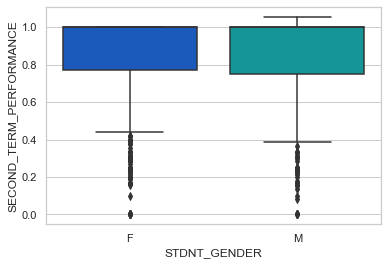

In [46]:
sns.set_style('whitegrid')

ax = sns.boxplot(x =data['STDNT_GENDER'],y ='SECOND_TERM_PERFORMANCE',data = data,palette ='winter')

In [47]:
print(data['SECOND_TERM_PERFORMANCE'].skew())

-1.7919656956699828


In [48]:
print(data['SECOND_TERM_PERFORMANCE'].quantile(0.10))

print(data['SECOND_TERM_PERFORMANCE'].quantile(0.90))

0.5833333333333334
1.0


In [49]:
data['SECOND_TERM_PERFORMANCE'].fillna(0.872315)

0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
3395    0.812500
3396    0.872315
3397    0.872315
3398    0.872315
3399    0.461538
Name: SECOND_TERM_PERFORMANCE, Length: 3400, dtype: float64

In [50]:
data.drop(['FIRST_TERM_ATTEMPT_HRS','FIRST_TERM_EARNED_HRS','SECOND_TERM_ATTEMPT_HRS','SECOND_TERM_EARNED_HRS'],axis =1,inplace = True)

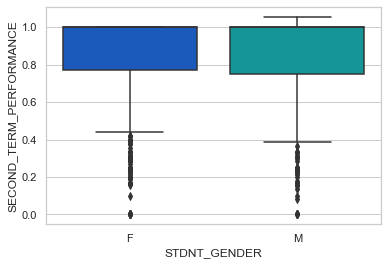

In [51]:
sns.set_style('whitegrid')

ax = sns.boxplot(x =data['STDNT_GENDER'],y ='SECOND_TERM_PERFORMANCE',data = data,palette ='winter')

In [52]:
data.groupby('STDNT_GENDER')['STDNT_TEST_ENTRANCE_COMB'].describe()

,count,mean,std,min,25%,50%,75%,max
STDNT_GENDER,,,,,,,,
F,1832.0,985.185590,150.715274,530.0,910.0,990.0,1070.0,1510.0
M,1050.0,1019.695238,163.281128,530.0,910.0,1030.0,1150.0,1460.0


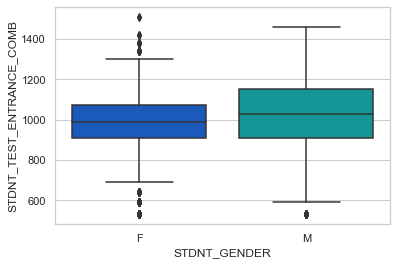

In [53]:
sns.set_style('whitegrid')

ax = sns.boxplot(x =data['STDNT_GENDER'],y ='STDNT_TEST_ENTRANCE_COMB',data = data,palette ='winter')

In [54]:
print(data['STDNT_TEST_ENTRANCE_COMB'].skew())

-0.36469197420163796


In [55]:
data['STDNT_TEST_ENTRANCE_COMB'].describe()

count    2882.000000
mean      997.758501
std       156.268221
min       530.000000
25%       910.000000
50%       990.000000
75%      1110.000000
max      1510.000000
Name: STDNT_TEST_ENTRANCE_COMB, dtype: float64

In [56]:
print(data['STDNT_TEST_ENTRANCE_COMB'].quantile(0.10))

print(data['STDNT_TEST_ENTRANCE_COMB'].quantile(0.90))

830.0
1190.0


In [57]:
def stud_comb(cols):
    STDNT_TEST_ENTRANCE_COMB = cols[0]
    STDNT_GENDER =cols[1]
    
    if pd.isnull(STDNT_TEST_ENTRANCE_COMB):
        
        if STDNT_GENDER=='F':
            return 990.0
        else:
            return 1030.0
    else:
        return STDNT_TEST_ENTRANCE_COMB

In [58]:
data['STDNT_TEST_ENTRANCE_COMB'] = data[['STDNT_TEST_ENTRANCE_COMB','STDNT_GENDER']].apply(stud_comb,axis =1)

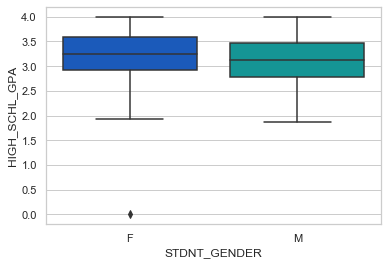

In [59]:
sns.set_style('whitegrid')

ax = sns.boxplot(x =data['STDNT_GENDER'],y ='HIGH_SCHL_GPA',data = data,palette ='winter')

In [60]:
data.groupby('STDNT_GENDER')['HIGH_SCHL_GPA'].describe()

,count,mean,std,min,25%,50%,75%,max
STDNT_GENDER,,,,,,,,
F,2111.0,3.249433,0.442327,0.00,2.93,3.25,3.60,4.0
M,1236.0,3.122985,0.466218,1.87,2.79,3.13,3.47,4.0


In [61]:
def gpa(cols):
    HIGH_SCHL_GPA = cols[0]
    STDNT_GENDER =cols[1]
    
    if pd.isnull(HIGH_SCHL_GPA):
        
        if STDNT_GENDER=='F':
            return 3.25
        else:
            return 3.13
    else:
        return HIGH_SCHL_GPA

In [62]:
data['HIGH_SCHL_GPA'] = data[['HIGH_SCHL_GPA','STDNT_GENDER']].apply(gpa,axis =1)

In [63]:
data['INTERNATIONAL_STS'].value_counts()

N    3373
Y      27
Name: INTERNATIONAL_STS, dtype: int64

In [64]:
dummya = pd.get_dummies(data['INTERNATIONAL_STS'])

data = pd.concat([data,dummya],axis = 1)

In [65]:
# ONE HOT ENCODING

top_10 = [x for x in data.STDNT_MAJOR.value_counts().sort_values(ascending =False).head(10).index]

In [66]:
print(top_10)

['Undeclared', 'Biology', 'Early Childhood Education', 'Pre-Nursing', 'Nursing', 'Psychology', 'Pre-Business', 'Theatre Arts', 'Music Performance', 'Criminal Justice']


In [67]:
for label in top_10:
    data[label] = np.where(data['STDNT_MAJOR']==label,1,0)
    
data[['STDNT_MAJOR']+ top_10].head(5)

,STDNT_MAJOR,Undeclared,Biology,Early Childhood Education,Pre-Nursing,Nursing,Psychology,Pre-Business,Theatre Arts,Music Performance,Criminal Justice
0,Undeclared,1,0,0,0,0,0,0,0,0,0
1,Undeclared,1,0,0,0,0,0,0,0,0,0
2,Mathematics,0,0,0,0,0,0,0,0,0,0
3,Undeclared,1,0,0,0,0,0,0,0,0,0
4,Art,0,0,0,0,0,0,0,0,0,0


In [68]:
data.STDNT_BACKGROUND.value_counts().sort_values(ascending = False).head(20)

BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64

In [69]:
top_5 = [x for x in data.STDNT_BACKGROUND.value_counts().sort_values(ascending =False).head(5).index]

In [70]:
print(top_5)

['BGD 1', 'BGD 3', 'BGD 4', 'BGD 2', 'BGD 6']


In [71]:
for label in top_5:
    data[label] = np.where(data['STDNT_BACKGROUND']==label,1,0)
    
data[['STDNT_BACKGROUND']+ top_5].head(5)

,STDNT_BACKGROUND,BGD 1,BGD 3,BGD 4,BGD 2,BGD 6
0,BGD 1,1,0,0,0,0
1,BGD 1,1,0,0,0,0
2,BGD 1,1,0,0,0,0
3,BGD 1,1,0,0,0,0
4,BGD 1,1,0,0,0,0


In [72]:
top_10 = [x for x in data.CORE_COURSE_NAME_1_F.value_counts().sort_values(ascending =False).head(10).index]

In [73]:
top_10

['ENGL',
 'HIST',
 'CHEM',
 'MATH',
 'COMM',
 'ARTH',
 'ECON',
 'CPSC',
 'POLS',
 'BIOL']

In [74]:
for label in top_10:
    data[label] = np.where(data['CORE_COURSE_NAME_1_F']==label,1,0)
    
data[['CORE_COURSE_NAME_1_F']+ top_10].head(5)

,CORE_COURSE_NAME_1_F,ENGL,HIST,CHEM,MATH,COMM,ARTH,ECON,CPSC,POLS,BIOL
0,ANTH,0,0,0,0,0,0,0,0,0,0
1,ANTH,0,0,0,0,0,0,0,0,0,0
2,ANTH,0,0,0,0,0,0,0,0,0,0
3,ANTH,0,0,0,0,0,0,0,0,0,0
4,ANTH,0,0,0,0,0,0,0,0,0,0


In [75]:
data = data.rename(columns = {'ENGL':'2015_ENGL',
                              'HIST':'2015_HIST',
                              'CHEM':'2015_CHEM',
                              'MATH':'2015_MATH',
                              'COMM':'2015_COMM',
                              'ARTH':'2015_ARTH',
                              'ECON':'2015_ECON',
                              'CPSC':'2015_CPSC',
                              'POLS':'2015_POLS',
                              'BIOL':'2015_BIOL'})

In [76]:
data['CORE_COURSE_NAME_2_F'].mode()

0    ENGL
dtype: object

In [77]:
data['CORE_COURSE_NAME_2_F'] = data['CORE_COURSE_NAME_2_F'].fillna('ENGL')

In [78]:
data['CORE_COURSE_NAME_2_F'].value_counts().sort_values(ascending = False).head(10)

ENGL    897
HIST    500
CHEM    352
MATH    320
COMM    233
POLS    138
ARTH    124
ECON    106
PSYC    103
MUSC     99
Name: CORE_COURSE_NAME_2_F, dtype: int64

In [79]:
top_10 = [x for x in data.CORE_COURSE_NAME_2_F.value_counts().sort_values(ascending =False).head(10).index]

top_10

['ENGL',
 'HIST',
 'CHEM',
 'MATH',
 'COMM',
 'POLS',
 'ARTH',
 'ECON',
 'PSYC',
 'MUSC']

In [80]:
for label in top_10:
    data[label] = np.where(data['CORE_COURSE_NAME_2_F']==label,1,0)
    
data[['CORE_COURSE_NAME_2_F']+ top_10].head(5)

,CORE_COURSE_NAME_2_F,ENGL,HIST,CHEM,MATH,COMM,POLS,ARTH,ECON,PSYC,MUSC
0,ARTH,0,0,0,0,0,0,1,0,0,0
1,GERM,0,0,0,0,0,0,0,0,0,0
2,ENGL,1,0,0,0,0,0,0,0,0,0
3,COMM,0,0,0,0,1,0,0,0,0,0
4,ARTH,0,0,0,0,0,0,1,0,0,0


In [81]:
data = data.rename(columns = {'ENGL':'2016_ENGL',
                              'HIST':'2016_HIST',
                              'CHEM':'2016_CHEM',
                              'MATH':'2016_MATH',
                              'COMM':'2016_COMM',
                              'POLS':'2016_POLS',
                              'ARTH':'2016_ARTH',
                              'ECON':'2016_ECON',
                              'PSYC':'2016_PSYC',
                              'MUSC':'2016_MUSC',
                              })

In [82]:
data['CORE_COURSE_NAME_3_F'].mode()

0    ENGL
dtype: object

In [83]:
data['CORE_COURSE_NAME_3_F'] = data['CORE_COURSE_NAME_3_F'].fillna('ENGL')

In [84]:
top_10 = [x for x in data.CORE_COURSE_NAME_3_F.value_counts().sort_values(ascending =False).head(10).index]

top_10

['ENGL',
 'HIST',
 'MATH',
 'CHEM',
 'ITDS',
 'COMM',
 'POLS',
 'MUSC',
 'THEA',
 'PSYC']

In [85]:
for label in top_10:
    data[label] = np.where(data['CORE_COURSE_NAME_3_F']==label,1,0)
    
data[['CORE_COURSE_NAME_3_F']+ top_10].head(5)

,CORE_COURSE_NAME_3_F,ENGL,HIST,MATH,CHEM,ITDS,COMM,POLS,MUSC,THEA,PSYC
0,ENGL,1,0,0,0,0,0,0,0,0,0
1,ITDS,0,0,0,0,1,0,0,0,0,0
2,HIST,0,1,0,0,0,0,0,0,0,0
3,ENGL,1,0,0,0,0,0,0,0,0,0
4,CPSC,0,0,0,0,0,0,0,0,0,0


In [86]:
data = data.rename(columns = {'ENGL':'2017_ENGL',
                              'HIST':'2017_HIST',
                              'CHEM':'2017_CHEM',
                              'MATH':'2017_MATH',
                              'COMM':'2017_COMM',
                              'POLS':'2017_POLS',
                              'ITDS':'2017_ITDS',
                              'THEA':'2017_THEA',
                              'PSYC':'2017_PSYC',
                              'MUSC':'2017_MUSC',
                              })

In [87]:
top_5 = [x for x in data.CORE_COURSE_GRADE_1_F.value_counts().sort_values(ascending =False).head(10).index]

top_5

['C', 'B', 'D', 'F', 'A', 'NOT REP', 'INCOMPL']

In [88]:
for label in top_5:
    data[label] = np.where(data['CORE_COURSE_GRADE_1_F']==label,1,0)
    
data[['CORE_COURSE_GRADE_1_F']+ top_5].head(5)

,CORE_COURSE_GRADE_1_F,C,B,D,F,A,NOT REP,INCOMPL
0,A,0,0,0,0,1,0,0
1,A,0,0,0,0,1,0,0
2,A,0,0,0,0,1,0,0
3,A,0,0,0,0,1,0,0
4,A,0,0,0,0,1,0,0


In [89]:
data = data.rename(columns = {'A':'2015_ENGL_A',
                              'B':'2015_HIST_B',
                             'C':'2015_MATH_C',
                             'D':'2015_CHEM_D',
                             'F':'2015_ITDS_F'})

In [90]:
top_5 = [x for x in data.CORE_COURSE_GRADE_2_F.value_counts().sort_values(ascending =False).head(10).index]

top_5

['B', 'C', 'A', 'D', 'F', 'INCOMPL', 'NOT REP']

In [91]:
for label in top_5:
    data[label] = np.where(data['CORE_COURSE_GRADE_2_F']==label,1,0)
    
data[['CORE_COURSE_GRADE_2_F']+ top_5].head(5)

,CORE_COURSE_GRADE_2_F,B,C,A,D,F,INCOMPL,NOT REP
0,A,0,0,1,0,0,0,0
1,A,0,0,1,0,0,0,0
2,A,0,0,1,0,0,0,0
3,A,0,0,1,0,0,0,0
4,A,0,0,1,0,0,0,0


In [92]:
data = data.rename(columns = {'A':'2016_ENGL_A',
                              'B':'2016_HIST_B',
                             'C':'2016_MATH_C',
                             'D':'2016_CHEM_D',
                             'F':'2016_ITDS_F'})

In [93]:
data['CORE_COURSE_GRADE_3_F'].isnull().sum()

565

In [94]:
data['CORE_COURSE_GRADE_3_F'].describe()

count     2835
unique       6
top          B
freq      1155
Name: CORE_COURSE_GRADE_3_F, dtype: object

In [95]:
data.CORE_COURSE_GRADE_3_F.value_counts().sort_values(ascending =False).head(10)

B          1155
A          1132
C           416
D           103
F            28
INCOMPL       1
Name: CORE_COURSE_GRADE_3_F, dtype: int64

In [96]:
data['CORE_COURSE_GRADE_3_F'] = data['CORE_COURSE_GRADE_3_F'].fillna(value ='B')

In [97]:
top_5 = [x for x in data.CORE_COURSE_GRADE_3_F.value_counts().sort_values(ascending =False).head(10).index]

top_5

['B', 'A', 'C', 'D', 'F', 'INCOMPL']

In [98]:
for label in top_5:
    data[label] = np.where(data['CORE_COURSE_GRADE_3_F']==label,1,0)
    
data[['CORE_COURSE_GRADE_3_F']+ top_5].head(5)

,CORE_COURSE_GRADE_3_F,B,A,C,D,F,INCOMPL
0,A,0,1,0,0,0,0
1,A,0,1,0,0,0,0
2,A,0,1,0,0,0,0
3,B,1,0,0,0,0,0
4,A,0,1,0,0,0,0


In [99]:
data = data.rename(columns = {'A':'2017_ENGL_A',
                              'B':'2017_HIST_B',
                             'C':'2017_MATH_C',
                             'D':'2017_CHEM_D',
                             'NG':'2017_ITDS_NG'})

In [100]:
data.drop(['CORE_COURSE_NAME_1_F','CORE_COURSE_GRADE_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_GRADE_2_F','CORE_COURSE_NAME_3_F',
          'CORE_COURSE_GRADE_3_F'],axis =1,inplace = True)

In [101]:
data.drop(['MOTHER_HI_EDU_DESC','DEGREE_GROUP_DESC'],axis =1,inplace = True)

In [102]:
dummy = pd.get_dummies(data['STDNT_GENDER'])

In [103]:
data =pd.concat([data,dummy],axis =1)

In [104]:
dummy3 = pd.get_dummies(data['FATHER_HI_EDU_DESC'])

data =pd.concat([data,dummy3],axis =1)

In [105]:
dummy1 = pd.get_dummies(data['IN_STATE_FLAG'])

data =pd.concat([data,dummy1],axis =1)

In [106]:
data = data.rename(columns ={'F':'FEMALE','M':'MALE','Y':'IN_STATE','N':'OUT_STATE'})

In [107]:
dummy2 = pd.get_dummies(data['HOUSING_STS'])

data =pd.concat([data,dummy2],axis =1)

In [108]:
data.drop(['STDNT_MAJOR','STDNT_BACKGROUND','STDNT_GENDER','IN_STATE_FLAG','HOUSING_STS'],axis =1,inplace =True)

In [109]:
#MIN MAX SCALAR

from sklearn.preprocessing import MinMaxScaler

In [110]:
data_min_max = data[['GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED','DISTANCE_FROM_HOME','HIGH_SCHL_GPA']]

min_max_scaler = MinMaxScaler()

In [111]:
min_max_scaler.fit(data[['GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED','DISTANCE_FROM_HOME','HIGH_SCHL_GPA']])

MinMaxScaler()

In [112]:
array1 = min_max_scaler.transform(data[['GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED','DISTANCE_FROM_HOME','HIGH_SCHL_GPA']])

In [113]:
df = pd.DataFrame(data = array1,columns =['GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED','DISTANCE_FROM_HOME','HIGH_SCHL_GPA'])

In [114]:
data = data.drop(columns =['GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED','DISTANCE_FROM_HOME','HIGH_SCHL_GPA'])

In [115]:
data = data.join(df)

In [116]:
data['GROSS_FIN_NEED'].describe()

count    3400.000000
mean        0.142784
std         0.227599
min         0.000000
25%         0.000000
50%         0.000000
75%         0.282169
max         1.000000
Name: GROSS_FIN_NEED, dtype: float64

In [117]:
data = data.rename(columns = {'College/Beyond':'FAT_EDU_3','High School':'FAT_EDU_2','Middle School/Junior High':'FAT_EDU_1',
                             'No Information':'FAT_EDU_NO_INFO','Other/Unknown':'FAT_EDU_UNKNOWN'})

In [118]:
data['FAT_EDU_3'] = data.FAT_EDU_3.astype(int)

data['FAT_EDU_2'] = data.FAT_EDU_2.astype(int)

data['FAT_EDU_1'] = data.FAT_EDU_1.astype(int)

data['FAT_EDU_NO_INFO'] = data.FAT_EDU_NO_INFO.astype(int)

data['FAT_EDU_UNKNOWN'] = data.FAT_EDU_UNKNOWN.astype(int)

data['FEMALE'] = data.FEMALE.astype(int)

data['MALE'] = data.MALE.astype(int)

data['OUT_STATE'] = data.OUT_STATE.astype(int)

data['IN_STATE'] = data.IN_STATE.astype(int)

In [119]:
data = data.rename(columns = {'OFF_CAMPUS_3':'OFF_CAMPUS_','ON_CAMPUS':'ON_CAMPUS_',})

In [ ]:
data['OFF_CAMPUS_']=data.OUT_STATE.astype(int)
data['ON_CAMPUS_']=data.IN_STATE.astype(int) 

In [122]:
data.drop(['FEMALE','Off Campus','On Campus','FATHER_HI_EDU_DESC','CORE_COURSE_NAME_1_S','CORE_COURSE_GRADE_1_S','CORE_COURSE_NAME_2_S',
          'CORE_COURSE_GRADE_2_S','CORE_COURSE_GRADE_3_S','CORE_COURSE_NAME_3_S','INTERNATIONAL_STS'],axis =1,inplace = True)

In [123]:
data.drop(['STDNT_AGE','Early Childhood Education','HIGH_SCHL_GPA','SECOND_TERM_PERFORMANCE','2015_HIST','2015_CHEM','2015_POLS','2015_BIOL',
          '2016_HIST','2016_MATH','2016_COMM','2016_ECON','2016_PSYC','2017_ENGL','2017_CHEM','2017_MUSC','2017_PSYC'],axis =1,inplace = True)

In [124]:
X = data.drop('RETURNED_2ND_YR',axis =1)

y = data['RETURNED_2ND_YR']

In [129]:
train_x1 = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

C:\Users\viksb\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:        RETURNED_2ND_YR   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     5.385
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           4.03e-37
Time:                        17:29:03   Log-Likelihood:                -1621.5
No. Observations:                3400   AIC:                             3371.
Df Residuals:                    3336   BIC:                             3763.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [125]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size =0.2,random_state =110)

In [126]:
Y_train.isnull().sum()

0

In [ ]:
conda install -c conda-forge imbalanced-learn

In [152]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state =110)
X_train,Y_train = oversampler.fit_sample(X_train,Y_train)


In [128]:
print('Number transactions X_train dataset: ',X_train.shape)

print('Number transactions Y_train dataset: ',Y_train.shape)

print('Number transactions X_test dataset: ',X_test.shape)

print('Number transactions Y_test dataset: ',Y_test.shape)

Number transactions X_train dataset:  (4254, 68)
Number transactions Y_train dataset:  (4254,)
Number transactions X_test dataset:  (680, 68)
Number transactions Y_test dataset:  (680,)


In [131]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, log_loss

classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
   
]
    
""" Logging for visual comparison. """ 

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

""" Iterate through each classification model stated above, fitting the model to the train data and finally
    printing the accuracy and log loss of each model. """

for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

RandomForestClassifier
****Results****
Accuracy: 80.4412%
Log Loss: 0.47564527774970267
AdaBoostClassifier
****Results****
Accuracy: 81.0294%
Log Loss: 0.6840564567076135
GradientBoostingClassifier
****Results****
Accuracy: 81.9118%
Log Loss: 0.4544370491139824


In [132]:
log1 = log.sort_values(by='Accuracy',ascending=False)
log2 = log.sort_values(by='Log Loss')

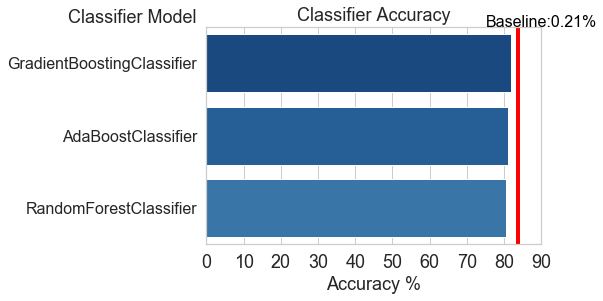

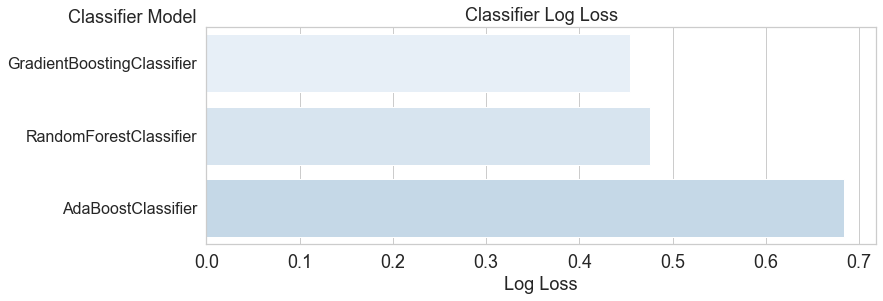

In [133]:
fig = sns.barplot(x='Accuracy', y='Classifier', data=log1, palette=sns.color_palette("Blues_r", n_colors=len('classifier')))
plt.xlabel('Accuracy %', fontsize=18)
plt.ylabel('Classifier Model',fontsize=18, position=(0,1),rotation=0)
fig.yaxis.labelpad= -125
fig.set_xticks(ticks=[0,10,20,30,40,50,60,70,80,90])
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Classifier Accuracy', fontsize=18)
plt.axvline(83.8, 0,1, lw=4, color='red')
plt.annotate(s='Baseline:0.21%', xy=(75,-0.5), fontsize=16, color='black')
plt.show()

plt.figure(figsize=(12,4))
fig = sns.barplot(x='Log Loss', y='Classifier', data=log2, palette=sns.color_palette("Blues", n_colors=len('Classifier')))
plt.xlabel('Log Loss', fontsize=18)
plt.ylabel('Classifier Model',fontsize=18, position=(0,1),rotation=0)
fig.yaxis.labelpad= -125
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Classifier Log Loss', fontsize=18)
plt.show()

In [134]:
## GRADIENTBOOSTING CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier

In [135]:
clf = GradientBoostingClassifier(n_estimators = 120,random_state =100)

In [136]:
clf.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=120, random_state=100)

In [137]:
clf.score(X_test,Y_test)

0.8220588235294117

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
mod = GridSearchCV(clf,param_grid ={'n_estimators':np.arange(10,200,10).tolist()})

mod.fit(X_train,Y_train)

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=120,
                                                  random_state=100),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190]})

In [140]:
mod.best_params_

{'n_estimators': 80}

In [141]:
clf =GradientBoostingClassifier(n_estimators=110,random_state=200)

In [142]:
clf.fit(X_train,Y_train)

clf.score(X_test,Y_test)

0.8235294117647058

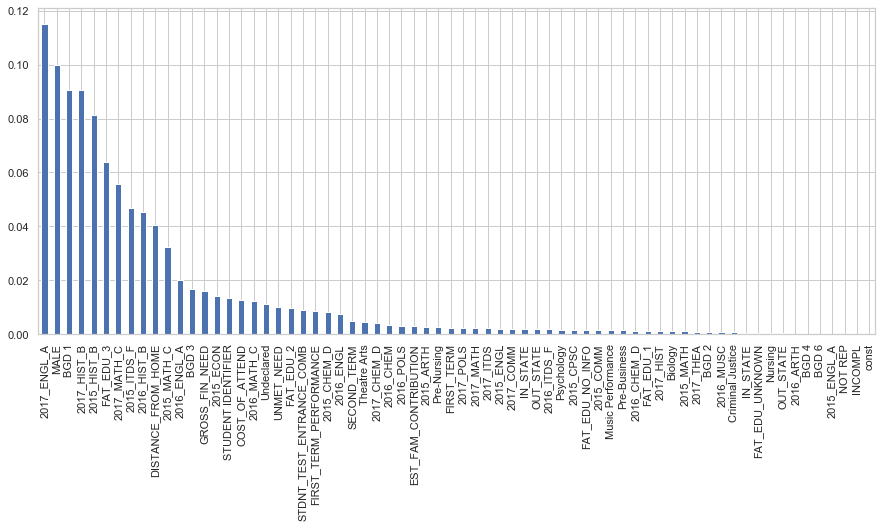

In [144]:
#FEATURE IMPORTANCE

feature_imp = pd.Series(clf.feature_importances_,index = X.columns)

plt.figure(figsize=(15,6))
feature_imp.sort_values(ascending = False).plot(kind ='bar')

In [145]:
feature_imp = pd.Series(clf.feature_importances_,index = X.columns)
feature_imp.sort_values(ascending = False)

2017_ENGL_A    0.115265
MALE           0.100052
BGD 1          0.090599
2017_HIST_B    0.090554
2015_HIST_B    0.081464
                 ...   
BGD 6          0.000000
2015_ENGL_A    0.000000
NOT REP        0.000000
INCOMPL        0.000000
const          0.000000
Length: 68, dtype: float64

In [146]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

Y_pred = clf.predict(X_test)

print(len(X_test))

print(accuracy_score(Y_test,Y_pred))

print(recall_score(Y_test,Y_pred))

print(confusion_matrix(Y_test,Y_pred))

680
0.8235294117647058
0.15384615384615385
[[540  10]
 [110  20]]


In [147]:
#CLASSIFICATION RESULTS

from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90       550
         1.0       0.67      0.15      0.25       130

    accuracy                           0.82       680
   macro avg       0.75      0.57      0.57       680
weighted avg       0.80      0.82      0.78       680



In [148]:
#ROC - AUC - SCORE

import sklearn.metrics as metrics

metrics.roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1])

0.6934825174825175

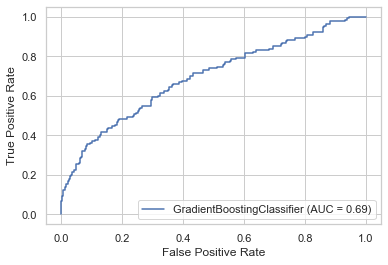

In [149]:
from sklearn.metrics import plot_roc_curve

svc_disp = plot_roc_curve(clf,X_test,Y_test)

plt.show()

In [150]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(clf,X,y,cv =10)

score

array([0.78235294, 0.79705882, 0.79117647, 0.80294118, 0.79117647,
       0.78529412, 0.79411765, 0.76764706, 0.75588235, 0.80588235])

In [151]:
score.mean()

0.7873529411764706